In [1]:
import numpy as np
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# 1)

In [2]:
cx,cy,cz = np.transpose(np.loadtxt('rand_points.txt'))[:,::5]
print(len(cx))

6051


<IPython.core.display.Javascript object>


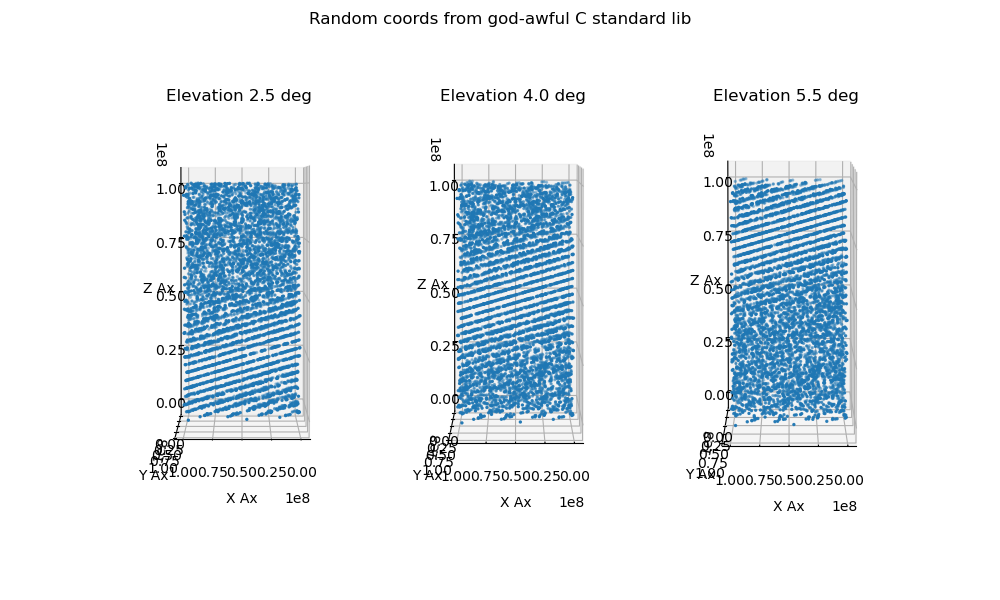

Text(0.5, 0.92, 'Elevation 5.5 deg')

In [3]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Random coords from god-awful C standard lib')
#ax = plt.axes(projection="3d")

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.view_init(2.5,90)
ax.scatter3D(cx,cy,cz , s=2)
ax.set_xlabel('X Ax');ax.set_ylabel('Y Ax');ax.set_zlabel('Z Ax')
ax.set_title('Elevation 2.5 deg')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.view_init(4,90)
ax.scatter3D(cx,cy,cz , s=2)
ax.set_xlabel('X Ax');ax.set_ylabel('Y Ax');ax.set_zlabel('Z Ax')
ax.set_title('Elevation 4.0 deg')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.view_init(5.5,90)
ax.scatter3D(cx,cy,cz , s=2)
ax.set_xlabel('X Ax');ax.set_ylabel('Y Ax');ax.set_zlabel('Z Ax')
ax.set_title('Elevation 5.5 deg')

<IPython.core.display.Javascript object>


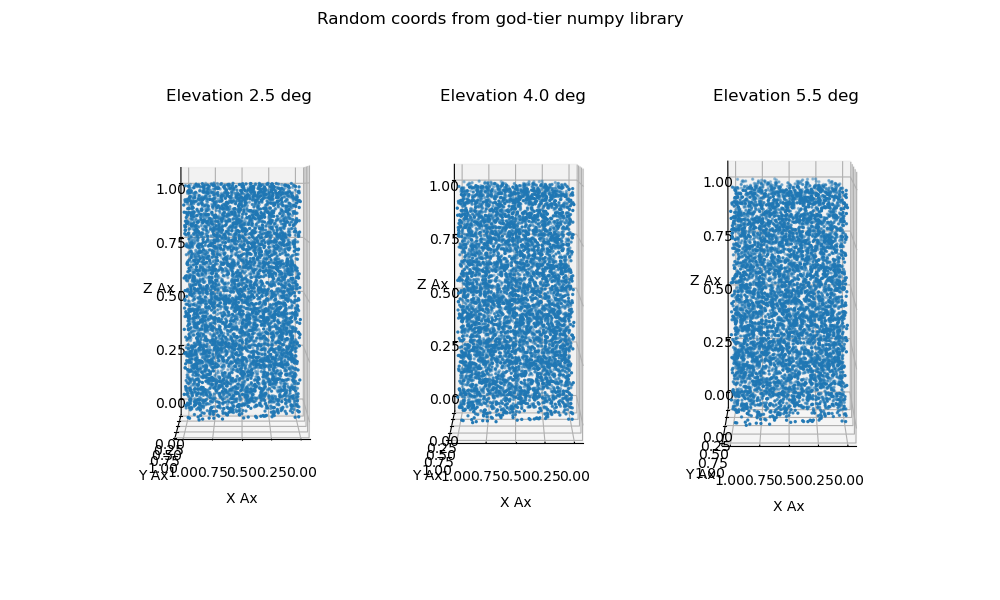

Text(0.5, 0.92, 'Elevation 5.5 deg')

In [4]:
nx,ny,nz = np.random.random((3,6051))

fig = plt.figure(figsize=(10,6))
fig.suptitle('Random coords from god-tier numpy library')
#ax = plt.axes(projection="3d")

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.view_init(2.5,90)
ax.scatter3D(nx,ny,nz , s=2)
ax.set_xlabel('X Ax');ax.set_ylabel('Y Ax');ax.set_zlabel('Z Ax')
ax.set_title('Elevation 2.5 deg')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.view_init(4,90)
ax.scatter3D(nx,ny,nz , s=2)
ax.set_xlabel('X Ax');ax.set_ylabel('Y Ax');ax.set_zlabel('Z Ax')
ax.set_title('Elevation 4.0 deg')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.view_init(5.5,90)
ax.scatter3D(nx,ny,nz , s=2)
ax.set_xlabel('X Ax');ax.set_ylabel('Y Ax');ax.set_zlabel('Z Ax')
ax.set_title('Elevation 5.5 deg')

## From the same vantage points that showed layered sets of 3D points in the C standard implementation, the numpy one does not. The numpy random distribution of 3D points does not seem to present obvious layering from any viewing angle
## Was not able to find a simple solution for the last part of this question. It is therefore left blank

# 2)

In [5]:
def expon(x,tau=1.0,amp=1.0,decay=False):
    return amp*np.exp( (-1 if decay else 1)*x/tau )
def powlaw(x,powa=1.0,amp=1.0,offset=0.0):
    return amp*x**powa + offset
def lorentz(x,a=1.0,b=1.0,c=1.0):
    return a/(b+c*x**2)

C:\Users\wilia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


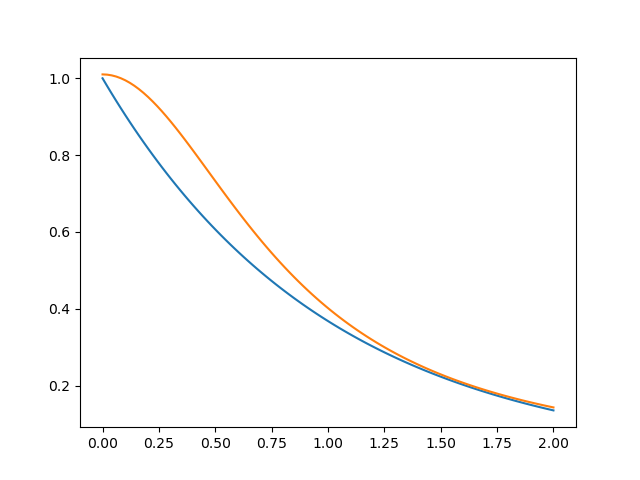

False
False


In [6]:
x = np.linspace(0,2,100)
y = expon(x,decay=True)
y2 = powlaw(x,-1.0,amp=0.1 , offset=1.0)
y3 = lorentz(x,b=0.99,c=1.5)
plt.figure()
plt.plot(x,y)
#plt.plot(x,y2)
plt.plot(x,y3)
print(np.any(np.where(y>y2)))
print(np.any(np.where(y>y3)))

## Decided to go with a lorentzian function as a bounding distribution

In [7]:
def lorentz_cdf_inv(n):
    return np.tan(np.pi*( np.random.random(n) )/2)
def expon_from_lorentz(x , tau=1.0,amp=1.0,decay=True , a=1.0,b=0.99,c=1.5):
    accept_prob = np.random.random(len(x))  <=  expon(x,tau,amp,decay) / lorentz(x,a,b,c)
    return x[accept_prob]

Fraction of accepted uniform deviates = 0.753245


<IPython.core.display.Javascript object>


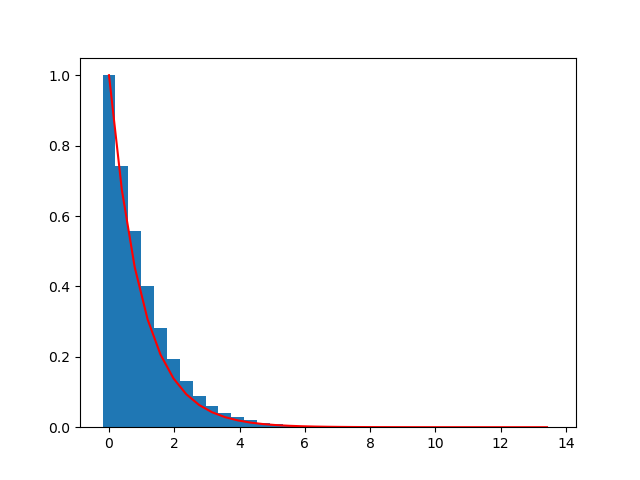

In [8]:
tau = 1.0;  amp=1.0;  decay=True
a=1.0;  b = 0.99;  c = 1.5
n = 1000000

lor_cdf_inv = lorentz_cdf_inv(n)
exp_from_lor = expon_from_lorentz(lor_cdf_inv , tau=tau,amp=amp,decay=decay , a=a,b=b,c=c)
print('Fraction of accepted uniform deviates =',len(exp_from_lor)/n)
efl_hist , bins = np.histogram(exp_from_lor,35)
efl_hist = efl_hist / efl_hist.max()
x_hist = bins[:-1]#bins[:-1] + np.diff(bins) / 2

plt.figure()
plt.bar(x_hist, efl_hist, np.diff(bins))
plt.plot(x_hist,expon(x_hist,tau=1.0,amp=1.0,decay=True) , color='r')

# 3)

Fraction of accepted = 0.24984


<IPython.core.display.Javascript object>


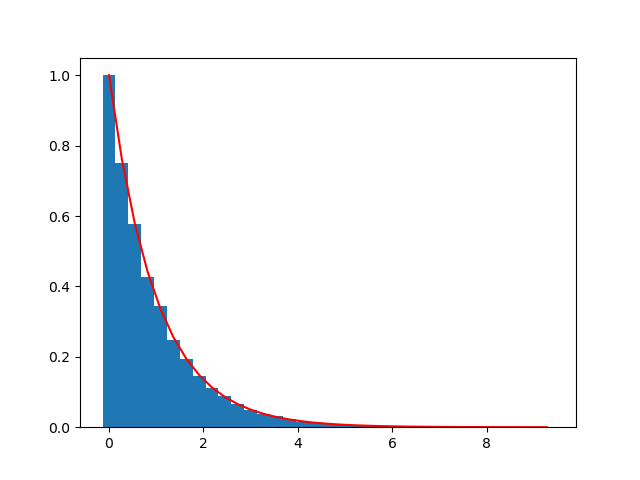

In [20]:
tau = 1.0;  amp=1.0;  decay=True
a=1.0;  b = 0.99;  c = 1.5

n=100000
u = np.random.random(n)
v = np.random.random(n)*2

rat = v/u
accept = u < np.sqrt(expon(rat,tau=tau,amp=amp,decay=decay))
rat = rat[accept]

print('Fraction of accepted =',len(rat)/n)

rat_hist , bins = np.histogram(rat,35)
rat_hist = rat_hist / rat_hist.max()
x_hist = bins[:-1]

plt.figure()
plt.bar(x_hist, rat_hist, np.diff(bins))
plt.plot(x_hist,expon(x_hist,tau=1.0,amp=1.0,decay=True) , color='r')